# Sales Prediction with Linear Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Simple Linear Regression with OLS Using Scikit-Learn

In [4]:
df = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")
df.shape

X = df[["TV"]]
y = df[["Sales"]]

(200, 4)

**Model**

In [5]:
reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
print(reg_model.intercept_[0])

# tv'nin katsayısı (w1)
print(reg_model.coef_[0][0])

6.974821488229891
0.055464770469558874


**Tahmin**

In [6]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

print(reg_model.intercept_[0] + reg_model.coef_[0][0]*150)

# 500 birimlik tv harcaması olsa ne kadar satış olur?

print(reg_model.intercept_[0] + reg_model.coef_[0][0]*500)

df.describe().T

15.294537058663721
34.70720672300933


,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
Radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
Newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
Sales,200.00,15.13,5.28,1.60,11.00,16.00,19.05,27.00


**Modelin Görselleştirilmesi**

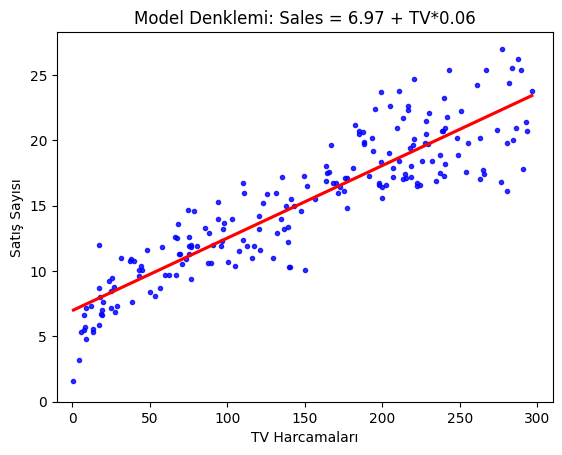

In [7]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

**Tahmin Başarısı**

In [28]:
# MSE
y_pred = reg_model.predict(X)
print(f'MSE: {mean_squared_error(y, y_pred)}')
# 10.51
print(f'Ortalama: {y["Sales"].mean()}')
print(f'Std.Sapma: {y["Sales"].std()}')

# RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred))}')
# 3.24

# MAE
print(f'MAE: {mean_absolute_error(y, y_pred)}')
# 2.54

# R-KARE
print(f'R^2: {reg_model.score(X, y)}')

MSE: 5.2177438977951285
Ortalama: 15.130500000000001
Std.Sapma: 5.283892252561876
RMSE: 2.2842381438447106
MAE: 1.8305872641932412
R^2: 0.8121757029987414


# Sales Prediction with Multiple Linear Regression

In [30]:
df = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

X = df.drop('Sales', axis=1)
y = df[["Sales"]]

**Model**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(f'y_test: {y_test.shape}')
print(f'y_train: {y_train.shape}')

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
print(reg_model.intercept_)

# coefficients (w - weights)
print(reg_model.coef_)

y_test: (40, 1)
y_train: (160, 1)
[4.63762444]
[[ 0.05507865  0.10308563 -0.00090115]]


**Tahmin**

In [35]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 4.63762444
# 0.05507865 , 0.10308563, -0.00090115

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

4.63762444 + 30 * 0.05507865 + 10 * 0.10308563 + 40 * -0.00090115

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

array([[7.28479435]])

**Tahmin Başarısını Değerlendirme**

In [39]:
# Train RMSE
y_pred = reg_model.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred))}')
# 1.73

# TRAIN RKARE
print(f'Train R^2: {reg_model.score(X_train, y_train)}')

# Test RMSE
y_pred = reg_model.predict(X_test)
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
# 1.41

# Test RKARE
print(f'Test R^2: {reg_model.score(X_test, y_test)}')


# 10 Katlı CV RMSE
cvRmse = np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))
print(f'10 layered CV RMSE: {cvRmse}')

# 1.69


# 5 Katlı CV RMSE
cvRmse = np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
print(f'5 layered CV RMSE: {cvRmse}')
# 1.71


Train RMSE: 1.6704413245680072
Train R^2: 0.905486333977187
Test RMSE: 1.552202825951676
Test R^2: 0.8747226291661847
10 layered CV RMSE: 1.658502109162588
5 layered CV RMSE: 1.6657702460059216


# Simple Linear Regression with Gradient Descent from Scratch

In [40]:
# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


In [41]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w


In [42]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


In [44]:
df = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

X = df["Radio"]
Y = df["Sales"]

In [46]:
# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 30000

In [47]:
cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 255.92392306730005
iter=0    b=0.02    w=0.3795    mse=78.16
iter=100    b=0.37    w=0.4876    mse=65.01
iter=200    b=0.70    w=0.4773    mse=62.73
iter=300    b=1.03    w=0.4673    mse=60.59
iter=400    b=1.35    w=0.4575    mse=58.56
iter=500    b=1.66    w=0.4481    mse=56.65
iter=600    b=1.96    w=0.4389    mse=54.84
iter=700    b=2.25    w=0.4300    mse=53.13
iter=800    b=2.53    w=0.4213    mse=51.52
iter=900    b=2.81    w=0.4129    mse=50.0
iter=1000    b=3.08    w=0.4047    mse=48.57
iter=1100    b=3.34    w=0.3967    mse=47.21
iter=1200    b=3.59    w=0.3890    mse=45.94
iter=1300    b=3.84    w=0.3815    mse=44.73
iter=1400    b=4.08    w=0.3742    mse=43.59
iter=1500    b=4.31    w=0.3671    mse=42.51
iter=1600    b=4.53    w=0.3602    mse=41.5
iter=1700    b=4.75    w=0.3535    mse=40.54
iter=1800    b=4.96    w=0.3470    mse=39.64
iter=1900    b=5.17    w=0.3406    mse=38.78
iter=2000    b=5.37    w=0.3345    mse